## PROJECT-2: PART-3 - Machine Learning: Artificial Neural Network

#### Objective: Applying Logistic Regression and Artificial Neural Network Models to test the effectiveness of Natural Language Processing Sentiment Scores in predicting trade decisions based On algorithmic trading 

---

### Code Overview

---

In [181]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [182]:
# Set a random seed for TensorFlow to allow reproducible testing results
#tf.random.set_seed(126)

In [183]:
# Read in data
df = pd.read_csv("Sentiment_Scores_1.csv")
sentiment_scores = df.dropna()
data = sentiment_scores.drop(columns=['Unnamed: 0','Stock','Date','JSON File Name'])
data.head()

,Buy/Sell,Sentiment Score
1,1,-0.4767
2,1,0.9075
3,1,0.5236
5,1,0.2023
6,1,0.9756


In [184]:
# Creating Feature and Target
X = data['Sentiment Score']
y = data['Buy/Sell']
# Creating training and testing datasets for logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=79, 
                                                    )

In [185]:
# Define the model
number_inputs = 1
number_hidden_nodes = 150

nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=1, activation="relu"))
nn.add(Dense(units=number_hidden_nodes, input_dim=37, activation="relu"))
nn.add(Dense(units=number_hidden_nodes, input_dim=37, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [186]:
# Printing Model Summary
nn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 150)               300       
_________________________________________________________________
dense_61 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_62 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 151       
Total params: 45,751
Trainable params: 45,751
Non-trainable params: 0
_________________________________________________________________


8. Fit the model with `100` epochs.

In [187]:
# Fit the model
model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 0.6973 - accuracy: 0.4112
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4962
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5150
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5367
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4889
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5051
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5094
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4900
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5275
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5415
Epoch 11/

9. Plot the loss function and accuracy.

In [188]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.6732 - accuracy: 0.6423
Loss: 0.6731773018836975, Accuracy: 0.642276406288147


In [189]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [190]:
df_plot

,loss,accuracy
1,0.695275,0.455041
2,0.693403,0.501362
3,0.692881,0.520436
4,0.692465,0.525886
5,0.692585,0.512262
...,...,...
96,0.686767,0.528610
97,0.686983,0.520436
98,0.687068,0.525886
99,0.687482,0.531335


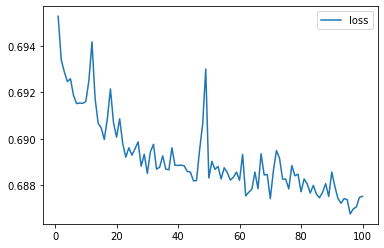

In [191]:
# Plot the loss
df_plot.plot(y="loss")

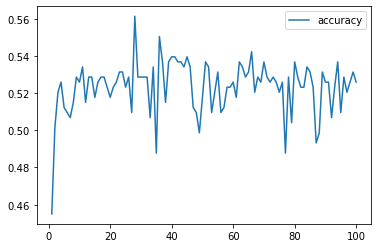

In [192]:
# Plot the accuracy
df_plot.plot(y="accuracy")
